In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
# Read the CSV file
dataset=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
dataset.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
dataset.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
30782,198704200002,1987,4,20,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
51646,199205280004,1992,5,28,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
164602,201607100017,2016,7,10,NaN,0,NaN,209,Turkey,10,...,NaN,"""Istanbul - Seven killed in two PKK attacks in...","""Soldier, village guard killed in PKK attack i...","""6 soldiers killed in bombing attacks in SE Tu...",START Primary Collection,0,0,0,0,NaN
18436,198304000008,1983,4,0,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
125669,201401080004,2014,1,8,NaN,0,NaN,205,Thailand,5,...,NaN,"""One wounded by two Pattani bombs,"" Bangkok Po...","""Southern Thailand: Social Media Weekly Highli...",NaN,START Primary Collection,-9,-9,0,-9,NaN
108360,201206040015,2012,6,4,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Roundup: Afghan militancy, conflicts claim 44...","""Firefight, air strikes kill 3 Taliban, wounds...",NaN,START Primary Collection,0,0,0,0,NaN
115116,201303120012,2013,3,12,NaN,0,NaN,78,Greece,8,...,NaN,"""Greece: Explosions at Three Political Offices...","""Small bomb explodes at Greek courier firm in ...","""Offices of three Greek MPs targeted with make...",START Primary Collection,0,0,0,0,"201303120011, 201303120012, 201303120013"
66545,199709080013,1997,9,8,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
166138,201608180044,2016,8,18,2016-08-18 00:00:00,0,NaN,153,Pakistan,6,...,NaN,"""Pakistan: Two MQM target killers arrested,"" T...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
90443,200901210015,2009,1,21,NaN,0,NaN,4,Afghanistan,6,...,NaN,"Pajhwok Afghan News, ""Seven Wounded as Bomber ...","BBC Monitoring South Asia, ""Suicide Bomber Tar...",NaN,ISVG,-9,-9,0,-9,NaN


In [4]:
dataset.shape

(181691, 135)

In [5]:
dataset.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataset.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
#Rename the necessary columns

dataset.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
dataset['Casualities'] = dataset.Killed + dataset.Wounded
dataset=dataset[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]
dataset.head(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary


In [10]:
dataset.sample(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
78645,2005,8,2,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Armed Assault,2.0,0.0,2.0,Two members of the Inspector General's Office,Unknown,Government (General),Firearms
147896,2015,5,10,Iraq,Middle East & North Africa,Tarmiyah,33.669689,44.381317,Bombing/Explosion,6.0,10.0,16.0,Checkpoint,Islamic State of Iraq and the Levant (ISIL),Police,Explosives
32542,1987,10,30,Turkey,Middle East & North Africa,Kayseri,38.730203,35.480720,Bombing/Explosion,0.0,0.0,0.0,anap office,Unknown,Government (General),Explosives
45223,1991,1,21,Myanmar,Southeast Asia,Mayan,16.232396,95.518919,Bombing/Explosion,3.0,4.0,7.0,Cargo Train,Kachin Independence Army (KIA),Transportation,Explosives
76867,2004,8,8,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Fereydun Jahani, an Iranian diplomat in Karbal...",Islamic Army in Iraq (al-Jaish al-Islami fi al...,Government (Diplomatic),Unknown
181503,2017,12,24,Afghanistan,South Asia,Marjah,31.467463,64.092445,Bombing/Explosion,7.0,3.0,10.0,Vehicle,Taliban,Private Citizens & Property,Explosives
90216,2009,1,4,Thailand,Southeast Asia,NaN,6.700696,101.433915,Armed Assault,1.0,0.0,1.0,The target was a Buddhist civilian.,Unknown,Private Citizens & Property,Firearms
5530,1977,11,14,Italy,Western Europe,L'Aquila,42.350698,13.399934,Facility/Infrastructure Attack,0.0,0.0,0.0,"Provincial HQ, Christian Democratic Party",Combat Nucleus of Communist Unity,Government (General),Incendiary
115120,2013,3,12,Afghanistan,South Asia,Dwah Manday,33.279678,69.594849,Bombing/Explosion,3.0,0.0,3.0,Unknown,Unknown,Unknown,Explosives
60143,1995,8,23,Pakistan,South Asia,Karachi,24.891115,67.143311,Armed Assault,0.0,0.0,0.0,Office of Negotiator: Asmal Dehlvi,Unknown,Violent Political Party,Firearms


In [11]:
dataset.shape

(181691, 16)

In [12]:
dataset.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Casualities  164817 non-null  float64
 12  Target       181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


In [14]:
dataset.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [15]:

dataset.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [16]:
#Removing the Missing data:
dataset.dropna(axis=0, inplace=True)
dataset.shape

(159946, 16)

In [17]:
#Re-Checking for Missing Data:
dataset.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Casualities    0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

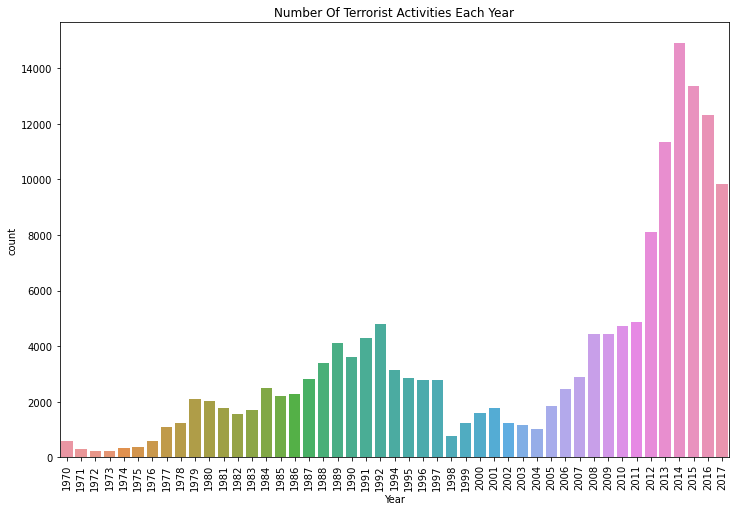

In [18]:
#Yearly Count of Terrorist Attack-

plt.figure(figsize=(12,8))
sns.countplot(x="Year", data=dataset)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

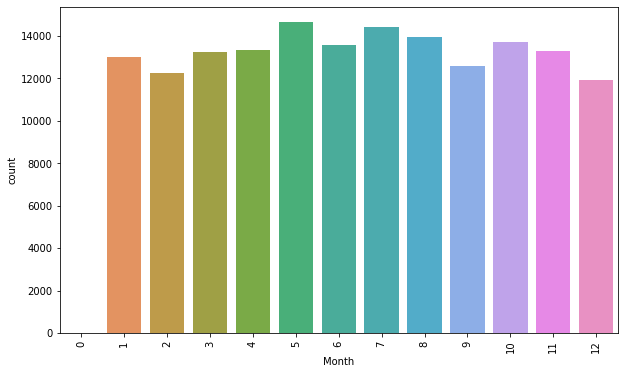

In [19]:
#month analysis
dataset['Month'].value_counts()
plt.figure(figsize = (10, 6))
sns.countplot(x='Month', data = dataset)
plt.xticks(rotation=90)
plt.show()

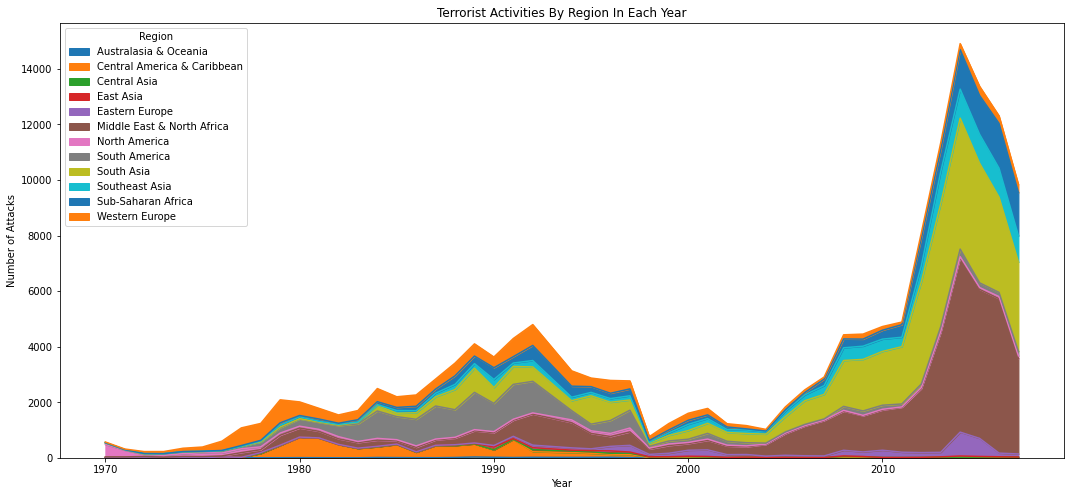

In [20]:
#Terrorist Activities By Region In Each Year
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(18,8))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()


In [21]:
dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int)
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
dataset['casualities'] = dataset['Killed'] + dataset['Wounded']

In [22]:
terror1 = dataset.sort_values(by='casualities',ascending=False)[:40]

In [23]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [24]:
heat.head(10)

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,536.0,0.000000,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1161.0,0.0,0.0,0.0,0.000000,0.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,520.000000,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,702.0,462.0,833.333333,0.0,654.0,670.0,0.0,911.666667,0.0
Japan,0.0,0.0,0.0,0.0,507.0,3092.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


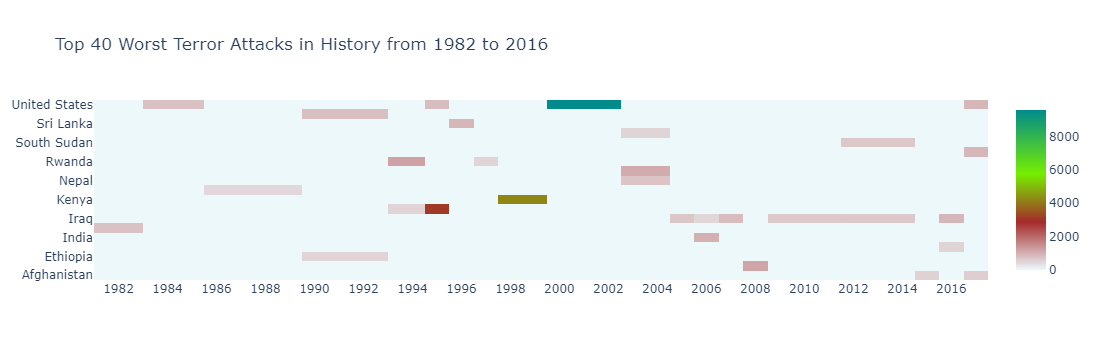

In [25]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#A52A2A'],  [.6,'#76EE00'],  [1, '#008B8B']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

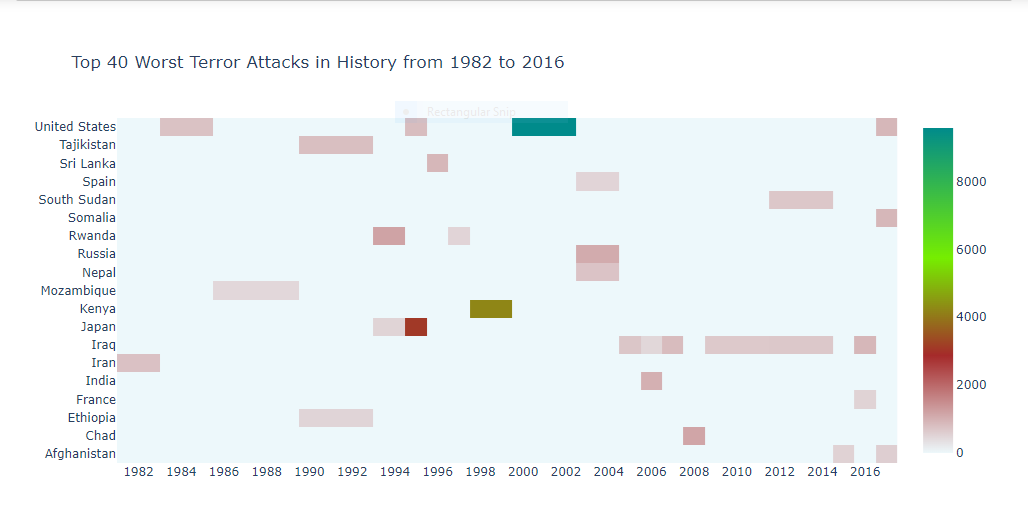

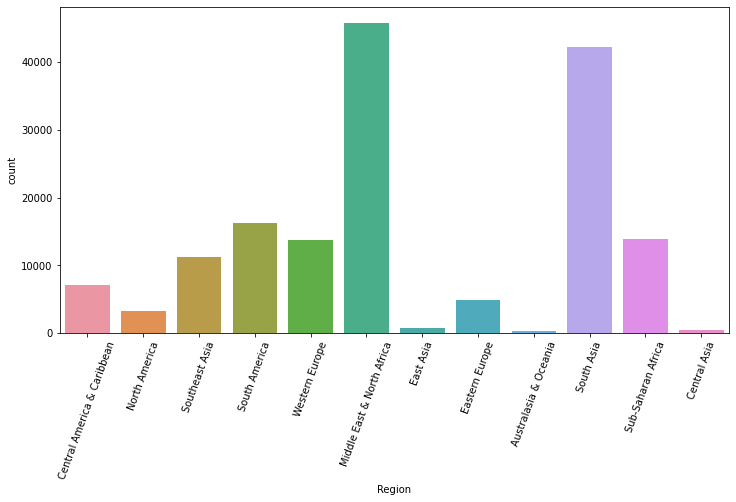

In [26]:
#REGION AFFECTED BY TERRORIST ATTACK
dataset['Region'].value_counts()
plt.figure(figsize=(12,6
                   ))
sns.countplot(x='Region',data=dataset)
plt.xticks(rotation=70)
plt.show()

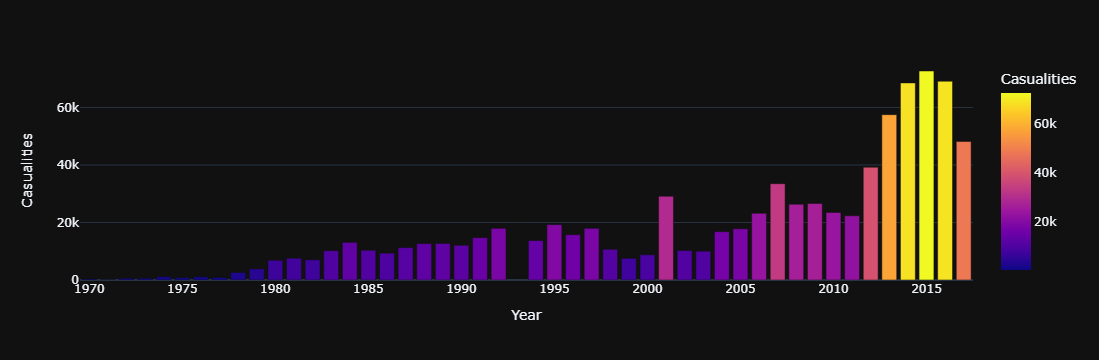

In [27]:
#Counting the Yearly Casualities-
year_cas = dataset.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
px.bar(data_frame=year_cas,x = 'Year',y = 'Casualities',color='Casualities',template='plotly_dark')

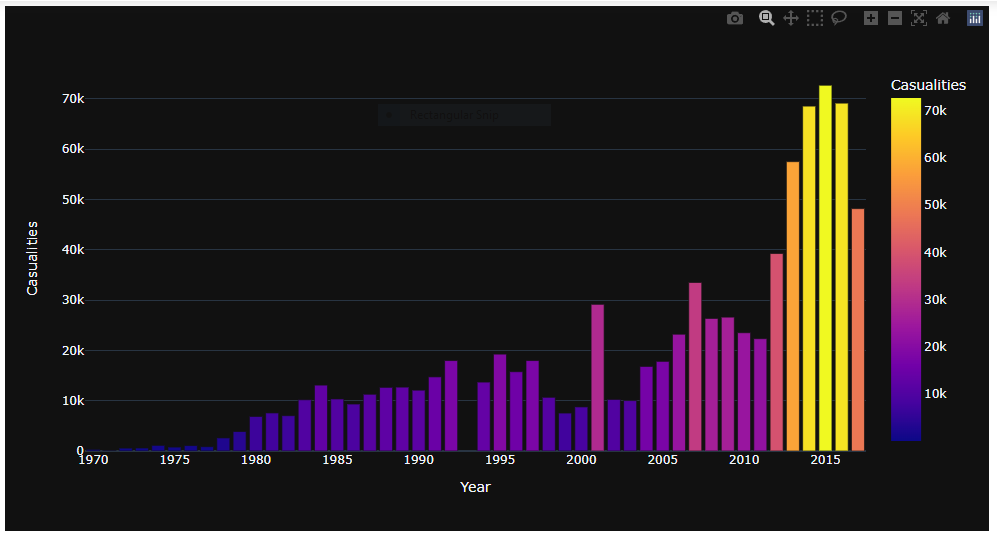

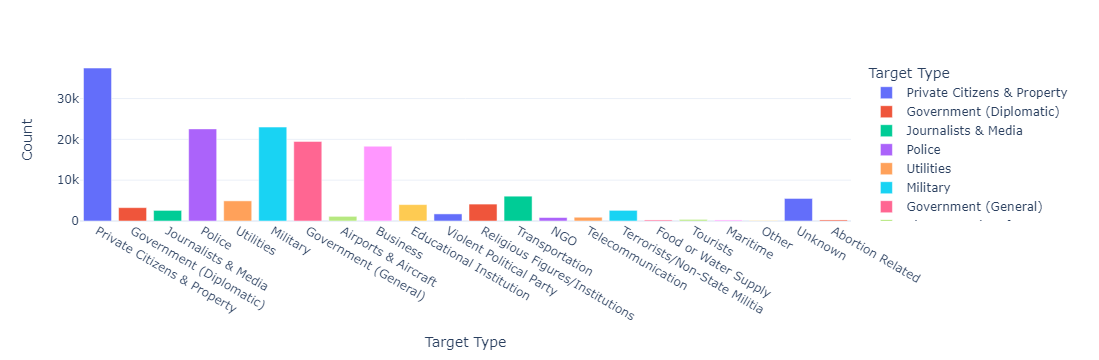

In [28]:
#Observation
#It is observed that 2015 marks the highest Casualities records.

#Type of Target Attacks
target = list(dataset['Target_type'])
target_map = dict(Counter(target))
target_df = pd.DataFrame(target_map.items())
target_df.columns = ['Target Type','Count']
px.bar(data_frame=target_df,x = 'Target Type',y = 'Count',color='Target Type',template='plotly_white')


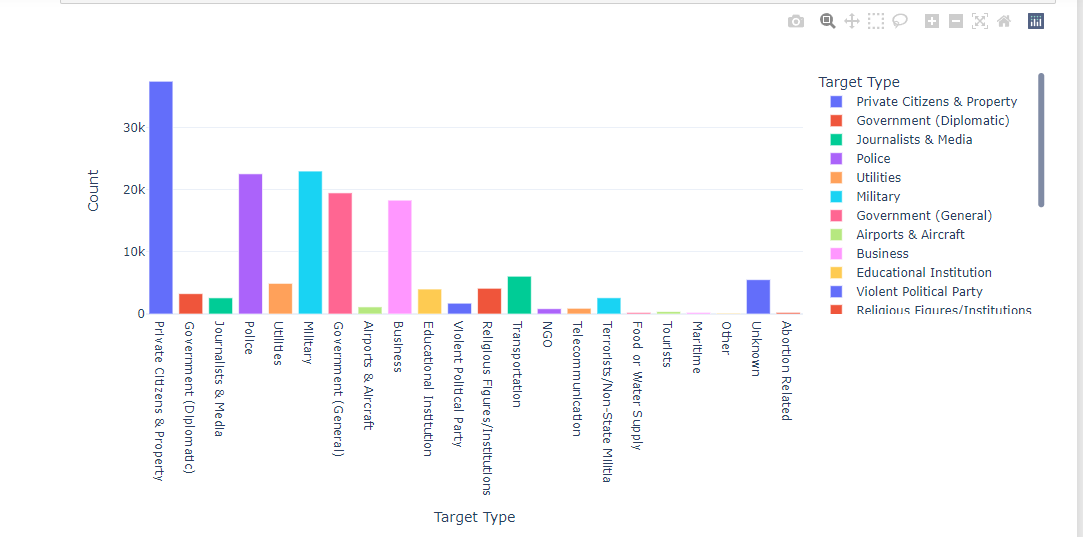

In [29]:
# Observation
# Private Citizens and Property Counts the highest amongst all.

# Analysing the Type of Attacks:-
#Counting the Casuallities according the Attack Type
AttackType=dataset.pivot_table(columns='AttackType',values='Casualities',aggfunc='sum')
AttackType = AttackType.T
AttackType['Type'] = AttackType.index

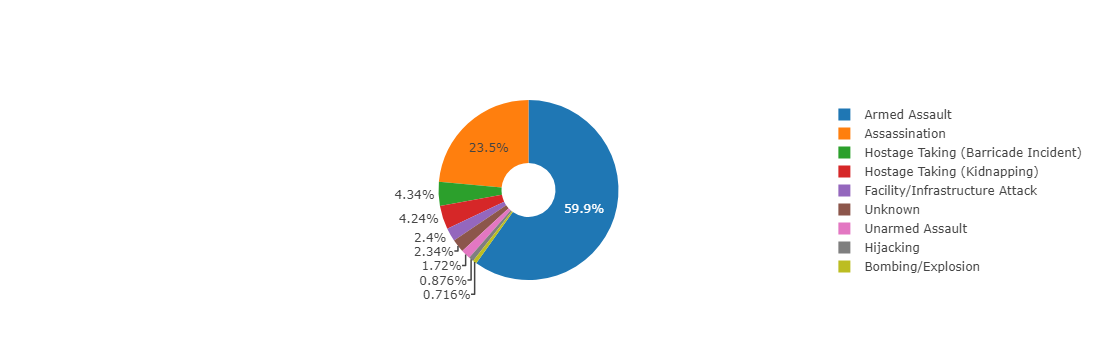

In [30]:
#plotting the Attack Type
labels = AttackType.columns.tolist()
attack=AttackType.T
values=attack.values.tolist()
values = sum(values,[])
attack_type = list(dataset['AttackType'].unique())
fig = go.Figure(data=[go.Pie(labels = attack_type,values=values,hole=.3)])
fig.update_layout(template = 'gridon')
fig.show()

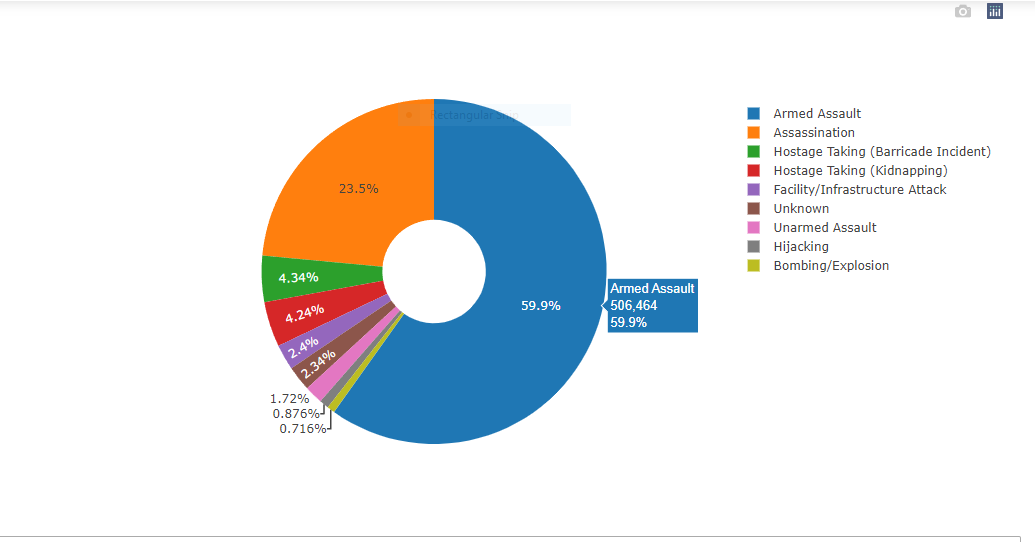

Text(0.5, 1.0, 'Favorite Targets')

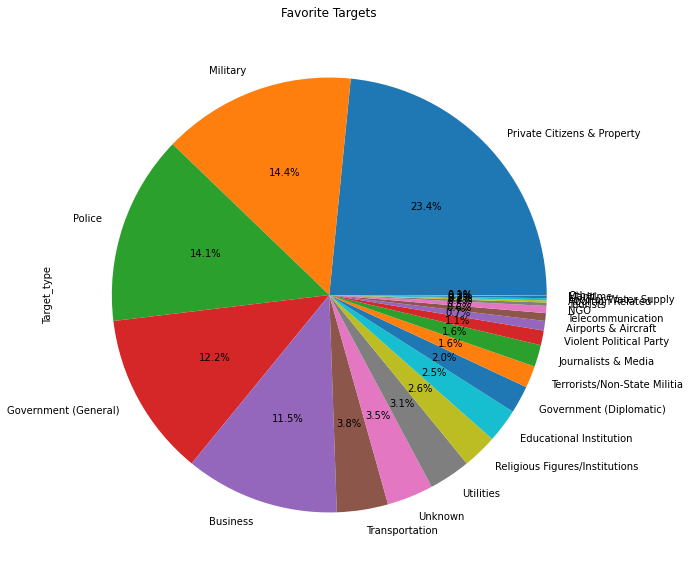

In [31]:
dataset['Target_type'].value_counts().plot(kind='pie',figsize=[12,10],autopct='%1.1f%%')
plt.title('Favorite Targets')

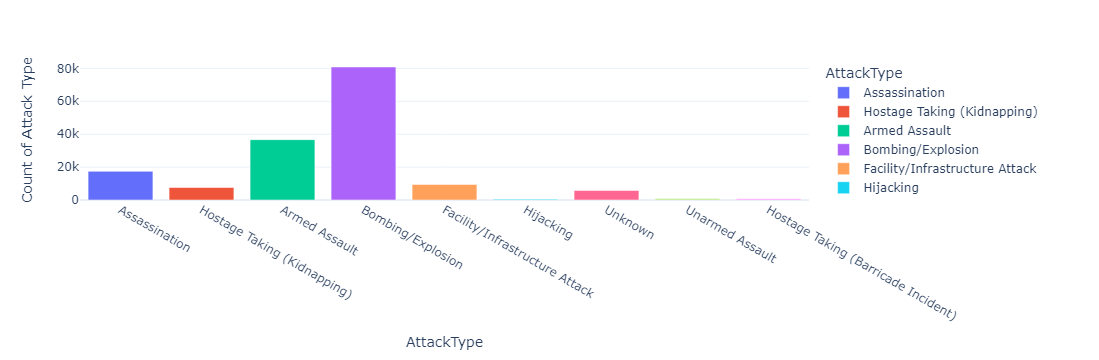

In [32]:
# Observation
# Bombing and Explosion method shows the highest chossen type.

# Count of Weapon Chssen for Attack.
from collections import Counter
values = list(dataset['AttackType'])
value_map = dict(Counter(values))
value_dataset = pd.DataFrame(value_map.items())
value_dataset.columns = ["AttackType","Count of Attack Type"]
px.bar(data_frame=value_dataset,x = 'AttackType',y = 'Count of Attack Type',color = 'AttackType',template="plotly_white")

<AxesSubplot:ylabel='Weapon_type'>

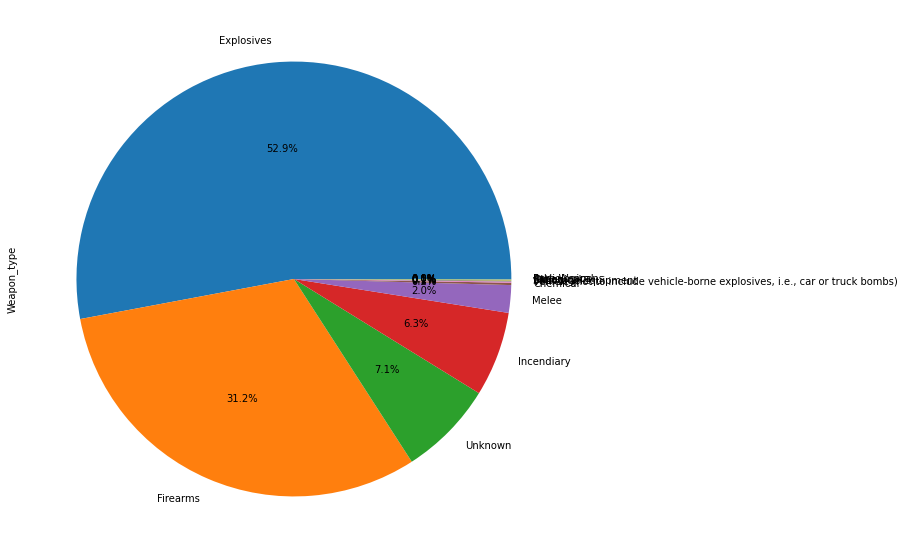

In [33]:
dataset['Weapon_type'].value_counts().plot(kind='pie',figsize=[15,10],autopct='%1.1f%%')

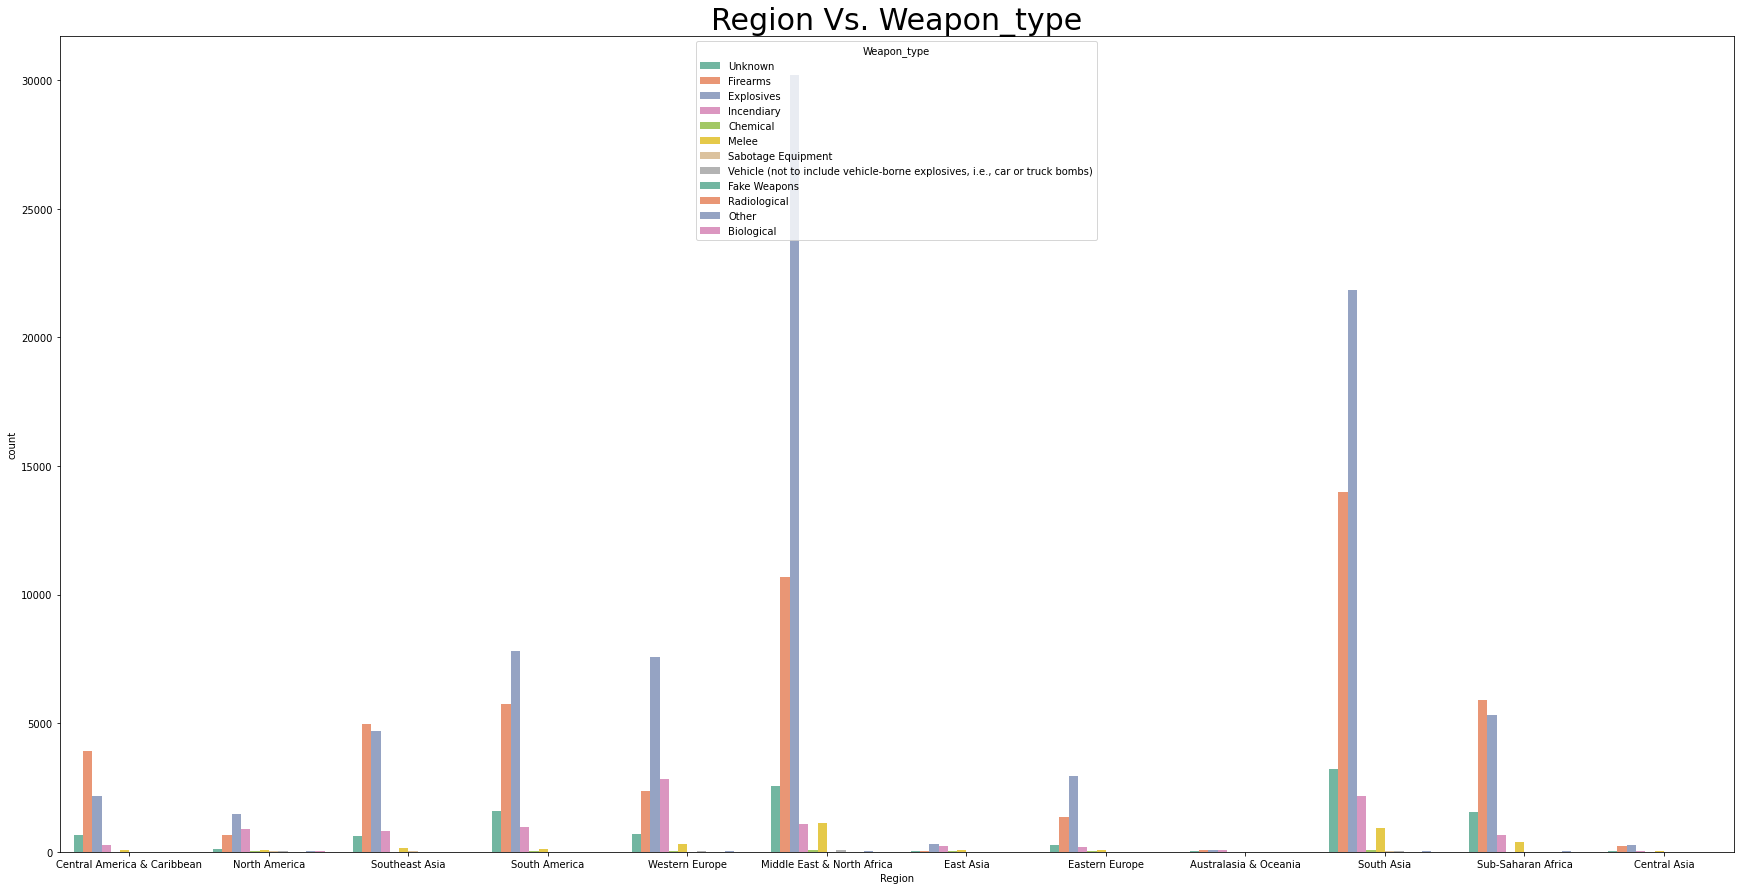

In [34]:
plt.subplots(figsize = (30,15))
sns.countplot(x="Region", hue ='Weapon_type', data = dataset,palette = "Set2")
plt.title('Region Vs. Weapon_type', fontsize = 30)
plt.show()

#### Group Vs. Weapon_type

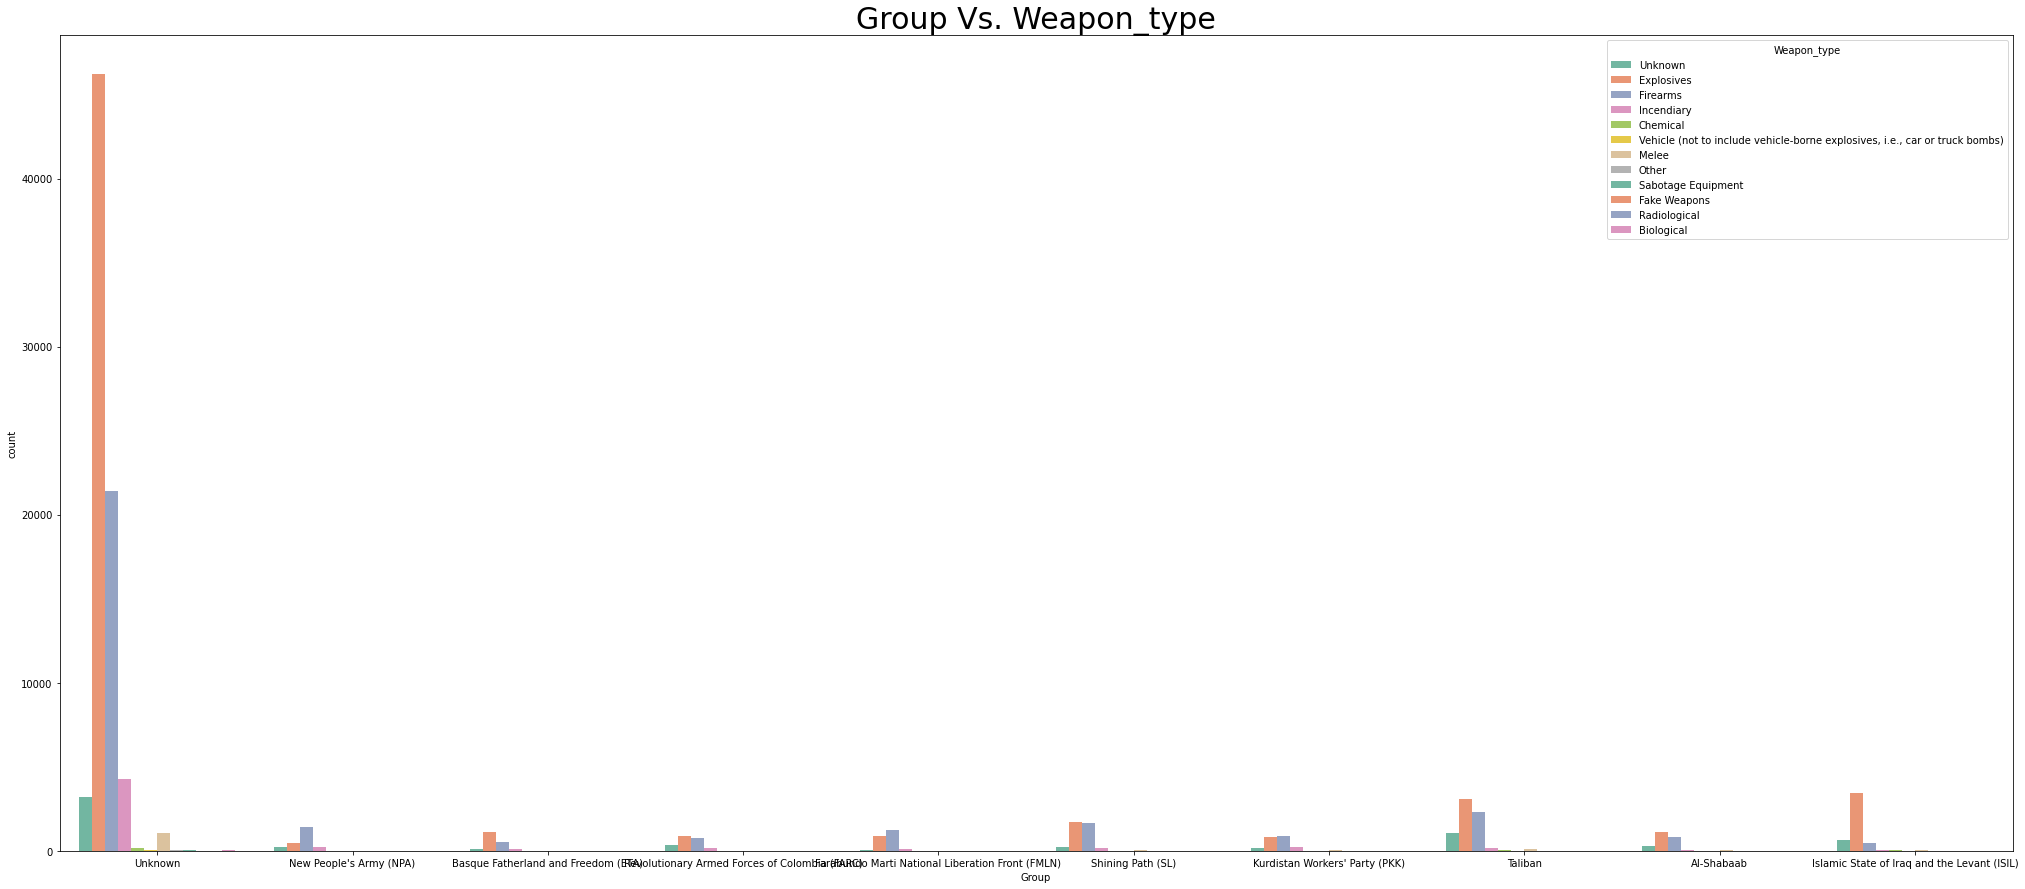

In [35]:
plt.subplots(figsize = (35,15))
Top_10_Group = dataset['Group'].value_counts().index.tolist()[0:10]
snap = dataset[['Group','Weapon_type']]
AttackG_Weapon = snap[snap['Group'].isin(Top_10_Group)]
sns.countplot(x='Group', hue ='Weapon_type', data = AttackG_Weapon,palette = "Set2")
plt.title('Group Vs. Weapon_type', fontsize = 30)
plt.show()

#### Top 10 Groups Trend

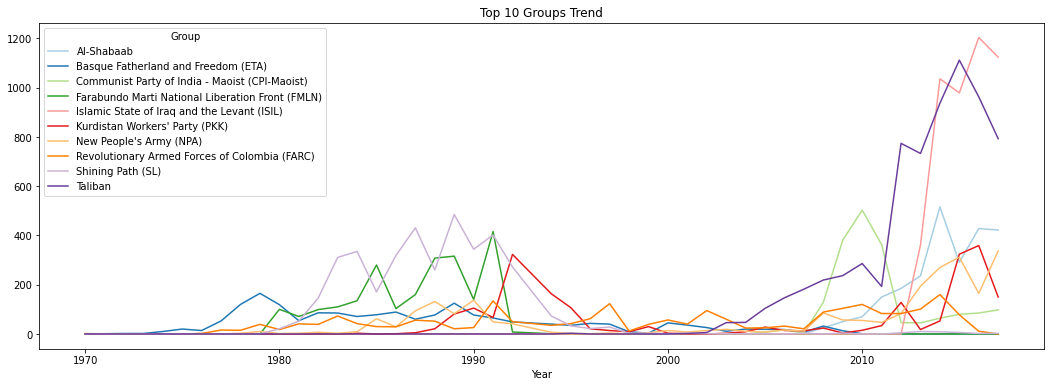

In [36]:
top_groups10=dataset[dataset['Group'].isin(dataset['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups Trend")
plt.show()

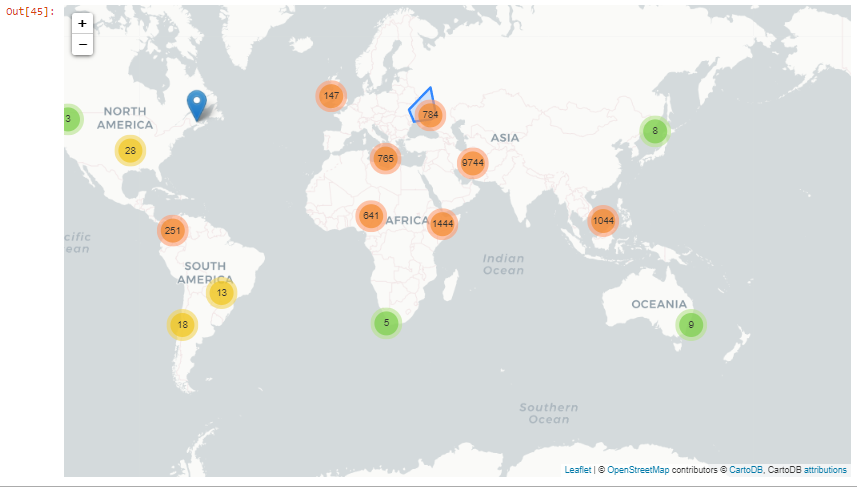

In [38]:
dataset.Country.value_counts()[:15]

Iraq              23122
Pakistan          13798
Afghanistan       11716
India             11293
Colombia           7262
Philippines        6220
Peru               5091
Turkey             3964
Thailand           3528
El Salvador        3499
United Kingdom     3486
Somalia            3095
Spain              2870
Yemen              2860
Nigeria            2852
Name: Country, dtype: int64

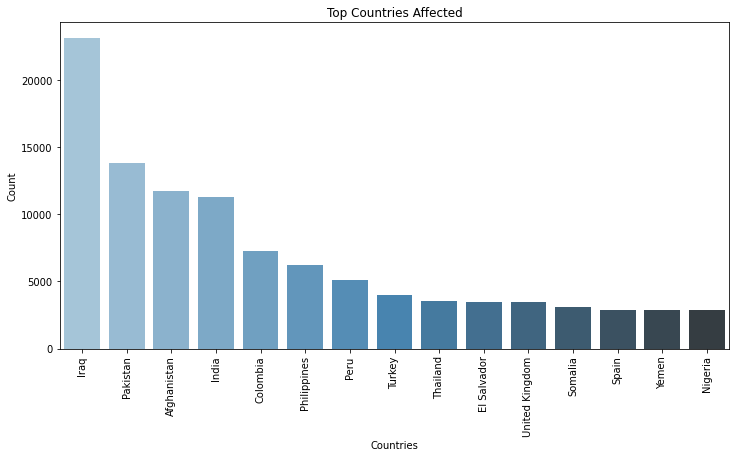

In [39]:
# Top Countries affected by Terror Attacks
plt.subplots(figsize=(12,6))
sns.barplot(dataset['Country'].value_counts()[:15].index,dataset['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [40]:
# Observation
# Iraq shows the highest Terror Attacks followed by other Middle-east region.

# Top 15 Countries showing the Highest Terror Attack.
plt.figure(figsize=(12,6))
country_attack=dataset.Country.value_counts()[:15].reset_index()
country_attack.columns= ["Country", "Total Attacks"]
px.bar(data_frame= country_attack,x = 'Country',y = 'Total Attacks',color = 'Country',template='plotly_white')

<Figure size 864x432 with 0 Axes>

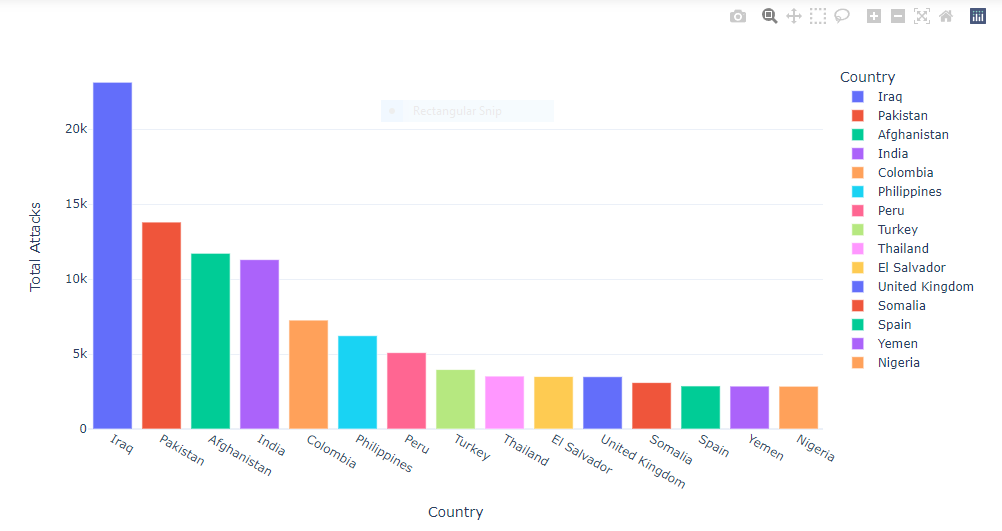

In [41]:
# Observation
# Iraq, again the highest followed by Pakistan, Afganistan and India.

# Counting the Total Number of Casualities in each Country.
plt.figure(figsize=(12, 6))
cas_count= dataset.groupby("Country").Casualities.sum().to_frame().reset_index().sort_values("Casualities", ascending=False)[:15]
px.bar(data_frame=cas_count,x = 'Country',y = 'Casualities',color='Country',template='plotly_white')

<Figure size 864x432 with 0 Axes>

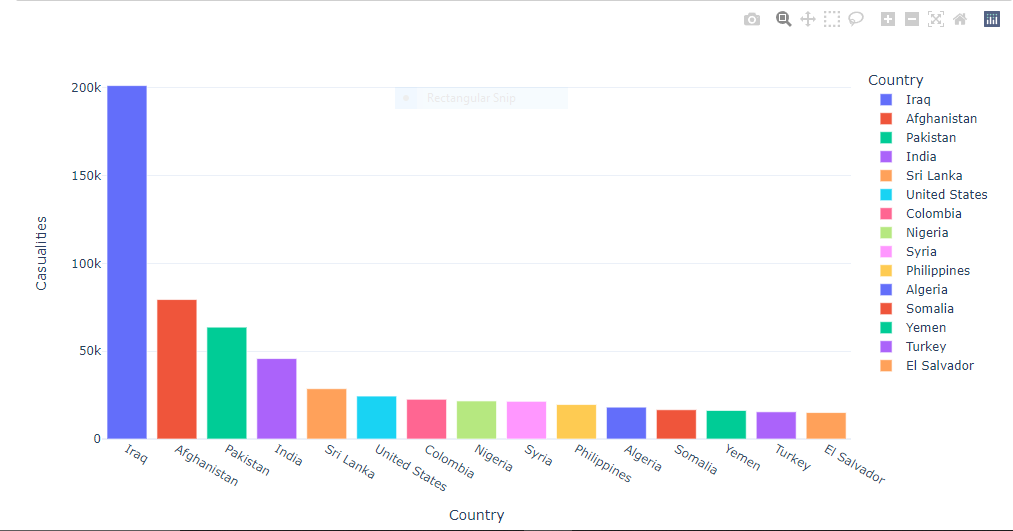

In [42]:
# Count of Terror Attack Region-Wise.
region_attacks = dataset.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
fig = px.bar_polar(data_frame=region_attacks,r = 'Total Attacks',theta='Region',color = 'Region',
                  template="ggplot2", color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

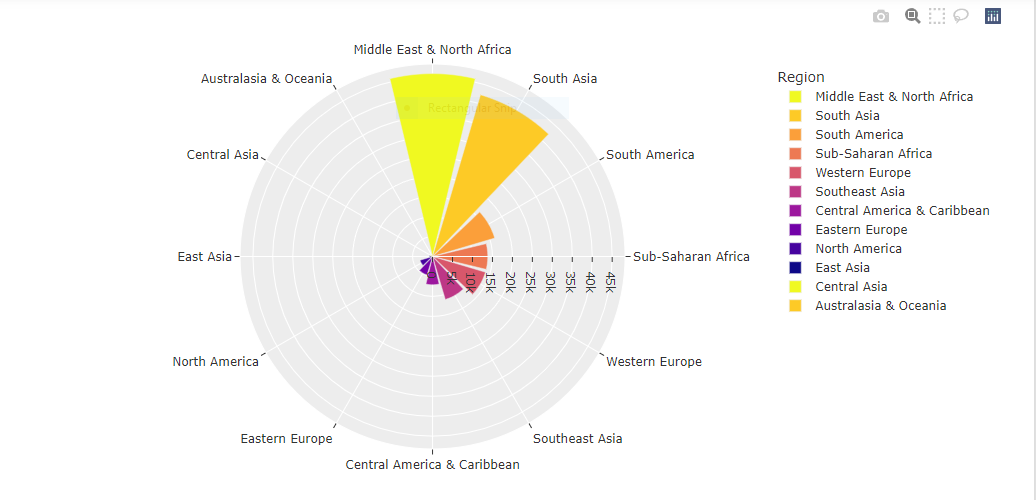